<a href="https://colab.research.google.com/github/pennya6/AI_study/blob/main/computervision/Simple_locatlization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

오브벡트를 원으로 고려  
CNN -> Feature Map -> FC Layer -> x,y, 반지름 예측

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random;
import tqdm;

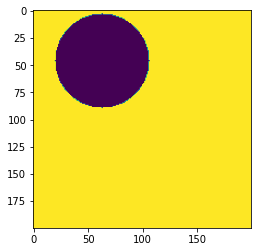

In [2]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(blank_image);

In [3]:
#위와 같은 이미지 총 만개 만들기
def create_training_Data():
  l = 10000;
  X_train = np.zeros(shape=[l,IMAGE_SIZE, IMAGE_SIZE,1]);
  Y_train = np.zeros(shape = [l,3]);
  for i in range(l):
    rad = random.randint(5,50);
    c_x = random.randint(rad,IMAGE_SIZE-rad);
    c_y = random.randint(rad,IMAGE_SIZE-rad);
    Y_train[i,0]= c_x/IMAGE_SIZE;
    Y_train[i,1] = c_y/IMAGE_SIZE;
    Y_train[i,2] = rad/IMAGE_SIZE;
    blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8);
    X_train[i,:,:,0] = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
  return {'X_Train' : X_train, 'Y_Train': Y_train};

In [4]:
training_Data = create_training_Data();

array([ 95., 148.,  45.])

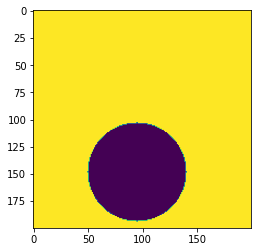

In [5]:
plt.imshow(training_Data['X_Train'][1999].reshape(200,200))
IMAGE_SIZE*training_Data['Y_Train'][1999]

In [6]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model

In [7]:
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = layers.Conv2D(5, 3, activation='relu', strides = 1, padding = 'same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(20, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(3, 5, activation='relu', strides = 1)(x)

# TODO
#flatten + dense layer
x = layers.Flatten()(x)
output = layers.Dense(3, activation='relu')(x) #3 -> x,y좌표와 반지름 예측

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 5)       50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 5)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 10)        460       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 20)        1820  

In [8]:
model.compile(loss='mean_squared_error',optimizer= 'adam', metrics=['mse']);

In [9]:
model.fit(training_Data["X_Train"],training_Data["Y_Train"], epochs = 3,verbose=1)

Epoch 1/3
313/313 [==============================] - 176s 559ms/step - loss: 0.0393 - mse: 0.0393
Epoch 2/3
313/313 [==============================] - 171s 546ms/step - loss: 0.0032 - mse: 0.0032
Epoch 3/3
313/313 [==============================] - 172s 549ms/step - loss: 0.0017 - mse: 0.0017


In [10]:
IMAGE_SIZE*model.predict(training_Data['X_Train'][3].reshape(1,IMAGE_SIZE, IMAGE_SIZE,1))

array([[46.902172, 60.136433, 10.135859]], dtype=float32)

In [11]:
IMAGE_SIZE*training_Data['Y_Train'][3]

array([42., 57.,  8.])

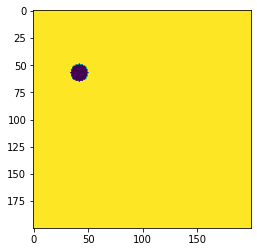

In [12]:
plt.imshow(training_Data['X_Train'][3].reshape(200,200))

[164, 148, 36]
[[161.89584  149.25041   27.940365]]


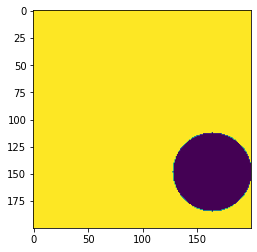

In [13]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
print([c_x, c_y, rad])
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
new_Image = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(new_Image);
print(IMAGE_SIZE*model.predict(new_Image.reshape(1,IMAGE_SIZE, IMAGE_SIZE,1)))